# Module 3

### Query 3.1
Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled.
* Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.
* Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial.
(Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

In [2]:
dataset = pd.read_csv("GOLD.csv")

In [3]:
dataset.Date.astype('datetime64')
dataset.set_index('Date',inplace = True)
dataset.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [4]:
#For Pred Column
X_Pred = dataset.iloc[:,:4]
y_Pred = dataset.iloc[:,-2]
y_Pred = y_Pred.dropna()
len_pred = len(y_Pred)

In [5]:
val = int(len_pred/2)
X_train = X_Pred[:val]
X_test = X_Pred[val : len_pred]

y_train = y_Pred[:val]
y_test = y_Pred[val:len_pred]

X_val_pred = X_Pred[len_pred:]

In [6]:
from sklearn.linear_model import LinearRegression
model_pred = LinearRegression()
model_pred.fit(X_train,y_train)
y_calc = model_pred.predict(X_test)

In [7]:
from sklearn.metrics import r2_score
r2_score(y_test,y_calc)

1.0

In [8]:
#For new column
X_new = dataset.iloc[:,:4]
y_new = dataset.iloc[:,-1]
len_new = len(y_new)

In [9]:
val = int(len_new/2)
X_train = X_new[:val]
X_test = X_new[val : len_new]

y_train = y_new[:val]
y_test = y_new[val:len_new]

X_val_new = X_new[len_new:]

In [10]:
model_new = LinearRegression()
model_new.fit(X_train,y_train)
y_pred_new = model_new.predict(X_test)

In [11]:
r2_score(y_test,y_pred_new)

0.9999830622110687

In [12]:
print("Since r2 score of the pred column is greater than the score of new column,therefore it is linearly dependent" 
" with OHLC and new is polynomial function of OHLC")

Since r2 score of the pred column is greater than the score of new column,therefore it is linearly dependent with OHLC and new is polynomial function of OHLC


In [13]:
y_pred = model_pred.predict(X_val_pred)
dataset['Pred'][len_pred:] = y_pred

CAPM CAPM Analysis and Beta Calculation using regression - <br>
CAPM(Capital Asset Pricing Model) attempts to price securities by examining the relationship that exists between expected returns and risk. 
Read more about CAPM. (Investopedia CAPM reference) 
The Beta of an asset is a measure of the sensitivity of its returns relative to a market benchmark (usually a market index). How sensitive/insensitive is the returns of an asset to the overall market returns (usually a market index like S&P 500 index). What happens when the market jumps, does the returns of the asset jump accordingly or jump somehow? 
Read more about Beta (Investopedia Beta reference)


### Query3.2
Import the stock of your choosing AND the Nifty index. 
Using linear regression (OLS), calculate -
* The daily Beta value for the past 3 months. (Daily= Daily returns)
* The monthly Beta value. (Monthly= Monthly returns)<p>
Refrain from using the (covariance(x,y)/variance(x)) formula.
Attempt the question using regression.(Regression Reference) <br>
Were the Beta values more or less than 1 ? What if it was negative ? 
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results


In [40]:
Nifty_df = pd.read_csv('Nifty50/Nifty50.csv')
NCC_df = pd.read_csv('Small_Cap/NCC.csv')

NCC_df = NCC_df[NCC_df.Series == 'EQ']

NCC_df['Date'] = NCC_df['Date'].astype('datetime64')
Nifty_df['Date'] = Nifty_df['Date'].astype('datetime64')

NCC_df.set_index('Date',inplace = True)
Nifty_df.set_index('Date',inplace = True)

NCC_df['Day_Precentage_Change'] = NCC_df['Close Price'].pct_change()
Nifty_df['Day_Precentage_Change'] = Nifty_df['Close'].pct_change()

NCC_df.dropna(inplace = True)
Nifty_df.dropna(inplace = True)

In [50]:
X = Nifty_df.iloc[-90:,-1:]
y = NCC_df.iloc[-90:,-1:]
model_beta = LinearRegression()
model_beta.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

AttributeError: 'LinearRegression' object has no attribute 'plot'

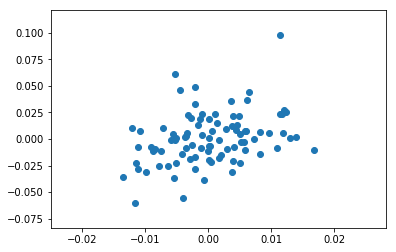

In [54]:
plt.figure()
plt.scatter(X,y)
model_beta.plot()
plt.show()

In [34]:
NCC_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day Precentage Change
Date,,,,,,,,,,,,,,,
2017-05-16,NCC,EQ,97.35,98.15,100.80,97.10,100.60,100.40,99.01,8251673,8.170074e+08,28908,2698728,32.71,0.031330
2017-05-17,NCC,EQ,100.40,100.95,103.65,100.10,101.35,101.45,102.05,9866001,1.006803e+09,40313,3276414,33.21,0.010458
2017-05-18,NCC,EQ,101.45,99.80,100.85,96.55,96.90,97.00,98.80,4163676,4.113649e+08,18977,1196998,28.75,-0.043864
2017-05-19,NCC,EQ,97.00,97.80,99.25,94.25,95.70,95.45,96.53,3782348,3.651142e+08,19517,706203,18.67,-0.015979
2017-05-22,NCC,EQ,95.45,96.00,97.95,94.65,95.00,95.25,96.56,3829849,3.698111e+08,16697,1116014,29.14,-0.002095


In [35]:
Nifty_df.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day Precentag Change
Date,,,,,,,
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.007078
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.001419
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-0.010109
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.000164
2017-05-22,9480.25,9498.65,9427.90,9438.25,202874757,9432.97,0.001098


In [47]:
Nifty_df['Day_Precentage_Change'][:-90].values


array([ 7.07751922e-03,  1.41922258e-03, -1.01094402e-02, -1.64378622e-04,
        1.09780545e-03, -5.52009112e-03, -2.72742285e-03,  1.59392343e-02,
        8.97499934e-03,  1.02135465e-03,  2.04583077e-03, -3.42873173e-04,
       -5.35273483e-04,  3.88931064e-03,  2.23753043e-03, -3.92244008e-03,
        2.77571689e-03, -1.72290690e-03,  2.17678613e-03, -5.36291470e-03,
       -9.87895678e-04,  1.17103332e-03, -4.16920094e-03,  1.04405385e-03,
        7.24860634e-03, -4.19361018e-04, -2.06142850e-03, -3.73692078e-04,
       -5.71651090e-03, -6.63711038e-03, -2.11851042e-03,  1.35387857e-03,
        1.76765817e-03,  9.88351942e-03, -1.76807072e-04,  2.52774802e-03,
        3.83394206e-03, -9.04434832e-04,  1.08889073e-02,  1.53514720e-03,
        3.07069757e-03,  7.70163303e-03, -5.40857487e-04,  2.99402712e-03,
       -8.95526904e-03,  7.37243250e-03, -2.65667300e-03,  4.24883271e-03,
        5.15872015e-03, -1.85623696e-04,  5.62995820e-03, -9.97939255e-06,
       -6.03759275e-04,  